# Generate seasonal and interannual TC genesis
Use 100 yrs of data (2001_10yr, 2002_10yr, ...2010_10yr)

2025.1.21
Mu-Ting Chien

In [2]:
# Load pacakages
import numpy as np
from netCDF4 import Dataset
import xarray as xr
import os
import sys
sys.path.append('/barnes-engr-scratch1/mchien/Function/')
import mjo_mean_state_diagnostics_uw as MJO
#
sys.path.append('/home/C832572266/code/function/')
import KW_diagnostics_new as KW
import matplotlib.pyplot as plt
import cartopy.util as cartopy_util
import cartopy.crs as ccrs
from datetime import datetime, timezone

In [3]:
DIR                    = '/barnes-engr-scratch1/c832572266/'
file_dir_multi_yr      = DIR + 'data_output/ace2/ace2_output/repeat_2001-2010/'
file_dir_multi_yr_10yr = DIR + 'data_output/ace2/ace2_output/10yr/'
fig_dir                = DIR + 'figure/ace2_fig/repeat_2001-2010/TC/from_slp/'
#dir_in_era5_TC    = DIR + 
expname                = list(['ace2','era5'])
nyr                    = 10 # 2001-2010 * 10 members
latmax                 = 30

In [4]:
# Load TC genesis data
yr_list = list(['2001','2002','2003','2004','2005',\
                '2006','2007','2008','2009','2010'])

# ACE2
for iyr in range(0, 10):
    yrname = yr_list[iyr]
    data = np.load(file_dir_multi_yr+'TC_genesis_10yr_'+yrname+'_from-slp.npz')

    lon_TC_ace2 = data['lon_TC']
    lat_TC_ace2 = data['lat_TC']
    yr_ace2     = data['yr']
    mon_ace2    = data['mon']
    day_ace2    = data['day']
    mslp_ace2   = data['mslp']
    vmax_ace2   = data['vmax']
    vmax_10m_ace2 = data['vmax_10m']
    hr_ace2       = data['hr']
    hsfc_ace2     = data['hsfc']


    # Only select TC genesis within 30S-30N
    lon_TC_ace2_30SN = np.where(np.abs(lat_TC_ace2)>30, np.nan, lon_TC_ace2)
    lat_TC_ace2_30SN = np.where(np.abs(lat_TC_ace2)>30, np.nan, lat_TC_ace2)
    yr_ace2_30SN     = np.where(np.abs(lat_TC_ace2)>30, np.nan, yr_ace2)
    mon_ace2_30SN    = np.where(np.abs(lat_TC_ace2)>30, np.nan, mon_ace2)
    day_ace2_30SN    = np.where(np.abs(lat_TC_ace2)>30, np.nan, day_ace2)
    hr_ace2_30SN     = np.where(np.abs(lat_TC_ace2)>30, np.nan, hr_ace2)
    mslp_ace2_30SN   = np.where(np.abs(lat_TC_ace2)>30, np.nan, mslp_ace2)
    vmax_ace2_30SN   = np.where(np.abs(lat_TC_ace2)>30, np.nan, vmax_ace2)
    vmax_10m_ace2_30SN   = np.where(np.abs(lat_TC_ace2)>30, np.nan, vmax_10m_ace2)
    hsfc_ace2_30SN       = np.where(np.abs(lat_TC_ace2)>30, np.nan, hsfc_ace2)

    lon_TC_ace2_30SN = lon_TC_ace2_30SN[~np.isnan(lon_TC_ace2_30SN)]
    lat_TC_ace2_30SN = lat_TC_ace2_30SN[~np.isnan(lat_TC_ace2_30SN)]
    yr_ace2_30SN     = yr_ace2_30SN[~np.isnan(yr_ace2_30SN)]
    mon_ace2_30SN    = mon_ace2_30SN[~np.isnan(mon_ace2_30SN)]
    day_ace2_30SN    = day_ace2_30SN[~np.isnan(day_ace2_30SN)]
    hr_ace2_30SN     = hr_ace2_30SN[~np.isnan(hr_ace2_30SN)]
    mslp_ace2_30SN   = mslp_ace2_30SN[~np.isnan(mslp_ace2_30SN)]
    vmax_ace2_30SN   = vmax_ace2_30SN[~np.isnan(vmax_ace2_30SN)]
    hsfc_ace2_30SN   = hsfc_ace2_30SN[~np.isnan(hsfc_ace2_30SN)]

    nTC_ace2 = np.size(lat_TC_ace2_30SN)
    if np.size(lon_TC_ace2_30SN)!=nTC_ace2 or np.size(yr_ace2_30SN)!=nTC_ace2 or np.size(mon_ace2_30SN)!=nTC_ace2 or\
        np.size(day_ace2_30SN)!=nTC_ace2:
        print('Size mismatch')
    else:
        print('Number of TC genesis in ACE2 (30S-30N):', nTC_ace2)
    

    np.savez(file_dir_multi_yr+'/TC_genesis_30SN/TC_genesis_10yr_'+yrname+'_from-slp_30SN.npz',\
             lon_TC = lon_TC_ace2_30SN, lat_TC=lat_TC_ace2_30SN, mslp=mslp_ace2_30SN, vmax=vmax_ace2_30SN,\
        vmax_10m=vmax_10m_ace2_30SN, hsfc=hsfc_ace2_30SN, yr=yr_ace2_30SN, mon=mon_ace2_30SN, day=day_ace2_30SN, hr=hr_ace2_30SN)


'''
# ERA5
data = np.load(dir_in_era5_TC+'TC_genesis_era5_2001-2010_1deg_'+str(latmax)+'SN.npz')
lon_TC_era5 = data['lon_TC']
lat_TC_era5 = data['lat_TC']
yr_era5     = data['yr']
mon_era5    = data['mon']
day_era5    = data['day']
'''

Number of TC genesis in ACE2 (30S-30N): 508
Number of TC genesis in ACE2 (30S-30N): 512
Number of TC genesis in ACE2 (30S-30N): 511
Number of TC genesis in ACE2 (30S-30N): 516
Number of TC genesis in ACE2 (30S-30N): 511
Number of TC genesis in ACE2 (30S-30N): 524
Number of TC genesis in ACE2 (30S-30N): 487
Number of TC genesis in ACE2 (30S-30N): 414
Number of TC genesis in ACE2 (30S-30N): 567
Number of TC genesis in ACE2 (30S-30N): 468


"\n# ERA5\ndata = np.load(dir_in_era5_TC+'TC_genesis_era5_2001-2010_1deg_'+str(latmax)+'SN.npz')\nlon_TC_era5 = data['lon_TC']\nlat_TC_era5 = data['lat_TC']\nyr_era5     = data['yr']\nmon_era5    = data['mon']\nday_era5    = data['day']\n"

# Separate the data into each basin


In [5]:
# Define basin
basin_list    = list(['NI','NWPAC','NEPAC','NATL','SI','SPAC'])
basin_long_list = list(['North IO','North WestPac','North EastPac','North Atl','South IO','South Pac'])
basin_lon_min = np.array([45, 105, 180, 265, 35, 135])
basin_lon_max = np.array([105, 180, 265, 357.5, 135, 270])
latmax = 30 #25 is not used, use 30
basin_lat_min = np.array([0,    0,    0,  0,  -latmax, -latmax])
basin_lat_max = np.array([latmax,  latmax, latmax, latmax,    0, 0])
nbasin        = np.size(basin_list)

# Count number of TC genesis for each basin for each year

In [15]:
save_100yr_TC = 0

if save_100yr_TC == 1:
    # Count number of TC genesis for each basin for each year
    nmem = 10
    TC_genesis_yr_basin_ace2 = np.zeros([nyr, nbasin, nmem])
    #TC_genesis_yr_basin_era5 = np.zeros([nyr, nbasin])

    iexp = 0

    for iyr in range(0, 10):

        yrname = yr_list[iyr]

        # Load TC genesis data from each year
        data = np.load(file_dir_multi_yr+'/TC_genesis_30SN/TC_genesis_10yr_'+yrname+'_from-slp_30SN.npz')

        # Assign basin index
        lon_TC   = data['lon_TC']
        lat_TC   = data['lat_TC']
        yr_fake_TC = data['yr']
        #if iexp == 0:
        basin_id_ace2 = np.zeros([np.size(lon_TC)])
        basin_id_ace2[:] = np.nan
        #else:
        #    basin_id_era5 = np.zeros([np.size(lon_TC)])
        #    basin_id_era5[:] = np.nan

        for i in range(0, np.size(lon_TC)):
            for ibasin in range(0, nbasin):
                #print(i, ibasin)
                if ( (lon_TC[i]-basin_lon_min[ibasin])*(basin_lon_max[ibasin]-lon_TC[i]) >= 0 ) and \
                    ( (lat_TC[i]-basin_lat_min[ibasin])*(basin_lat_max[ibasin]-lat_TC[i]) >= 0 ):
                    if iexp == 0:
                        basin_id_ace2[i] = ibasin
                    #elif iexp == 1:
                    #    basin_id_era5[i] = ibasin
                    #print(ibasin)
                    break
        
        for i in range(0, np.size(yr_fake_TC)):
            if np.isnan(basin_id_ace2[i]) != 1:
                imem     = int(yr_fake_TC[i]-2001)
                ibasin  = int(basin_id_ace2[i])

                TC_genesis_yr_basin_ace2[ iyr, ibasin, imem ] = TC_genesis_yr_basin_ace2[ iyr, ibasin, imem ] + 1

    # Save data
    yr = np.arange(2001, 2011)
    np.savez(file_dir_multi_yr + 'TC_genesis_number_yr_basin_mem_ace2_'+str(latmax)+'SN_100yr.npz', 
            TC_genesis_yr_basin_ace2 = TC_genesis_yr_basin_ace2,\
            basin_list = basin_list, basin_long_list=basin_long_list,\
            basin_lon_min = basin_lon_min, basin_lon_max = basin_lon_max, \
            basin_lat_min = basin_lat_min, basin_lat_max = basin_lat_max,\
            yr = yr, mem=np.arange(0,10) ) # (yr, basin, mem)
else:
    data = np.load(file_dir_multi_yr + 'TC_genesis_number_yr_basin_mem_ace2_'+str(latmax)+'SN_100yr.npz')
    TC_genesis_yr_basin_ace2 = data['TC_genesis_yr_basin_ace2']
    yr = data['yr']
    basin_list = data['basin_list']
    basin_long_list = data['basin_long_list']
    nbasin = np.size(basin_list)

In [4]:
# Load TC_genesis_count from 2001 to 2010
data = np.load(file_dir_multi_yr_10yr + 'TC_genesis_number_yr_basin_ace2_era5-1deg_'+str(latmax)+'SN_2001-2010.npz')
TC_genesis_yr_basin_ace2_2001_2010 = data['TC_genesis_yr_basin_ace2']
TC_genesis_yr_basin_era5_2001_2010 = data['TC_genesis_yr_basin_era5']

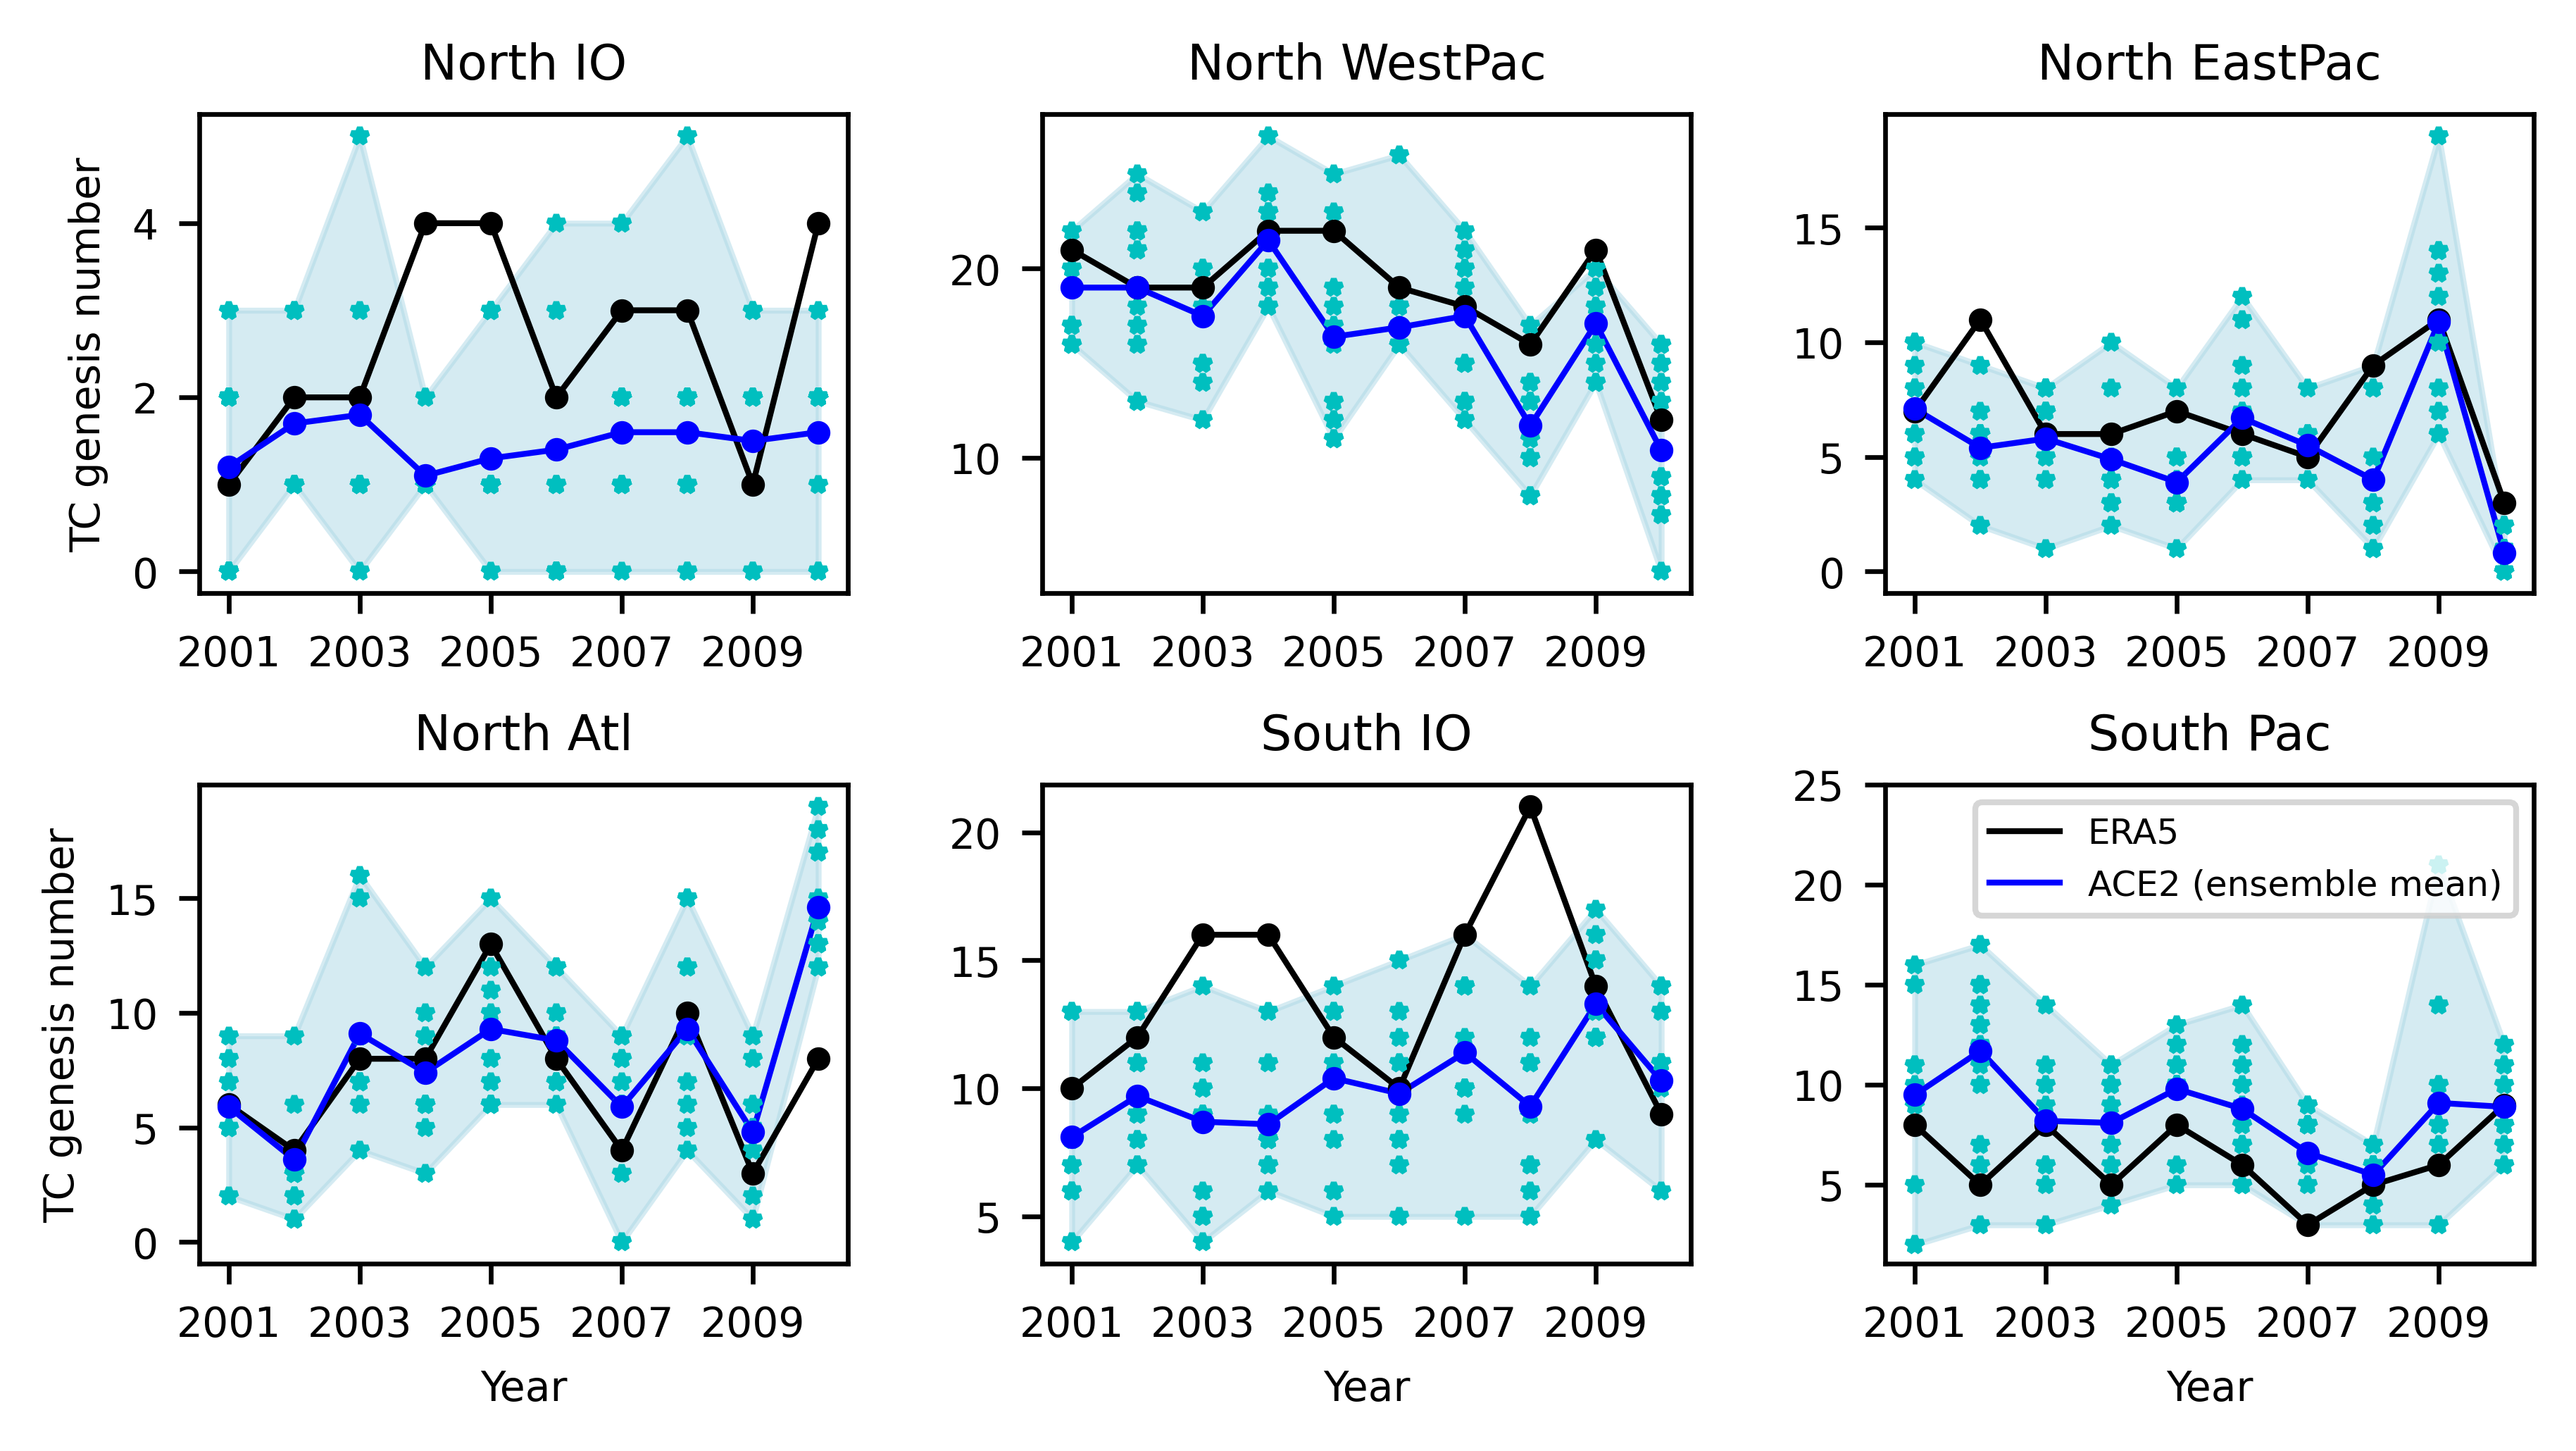

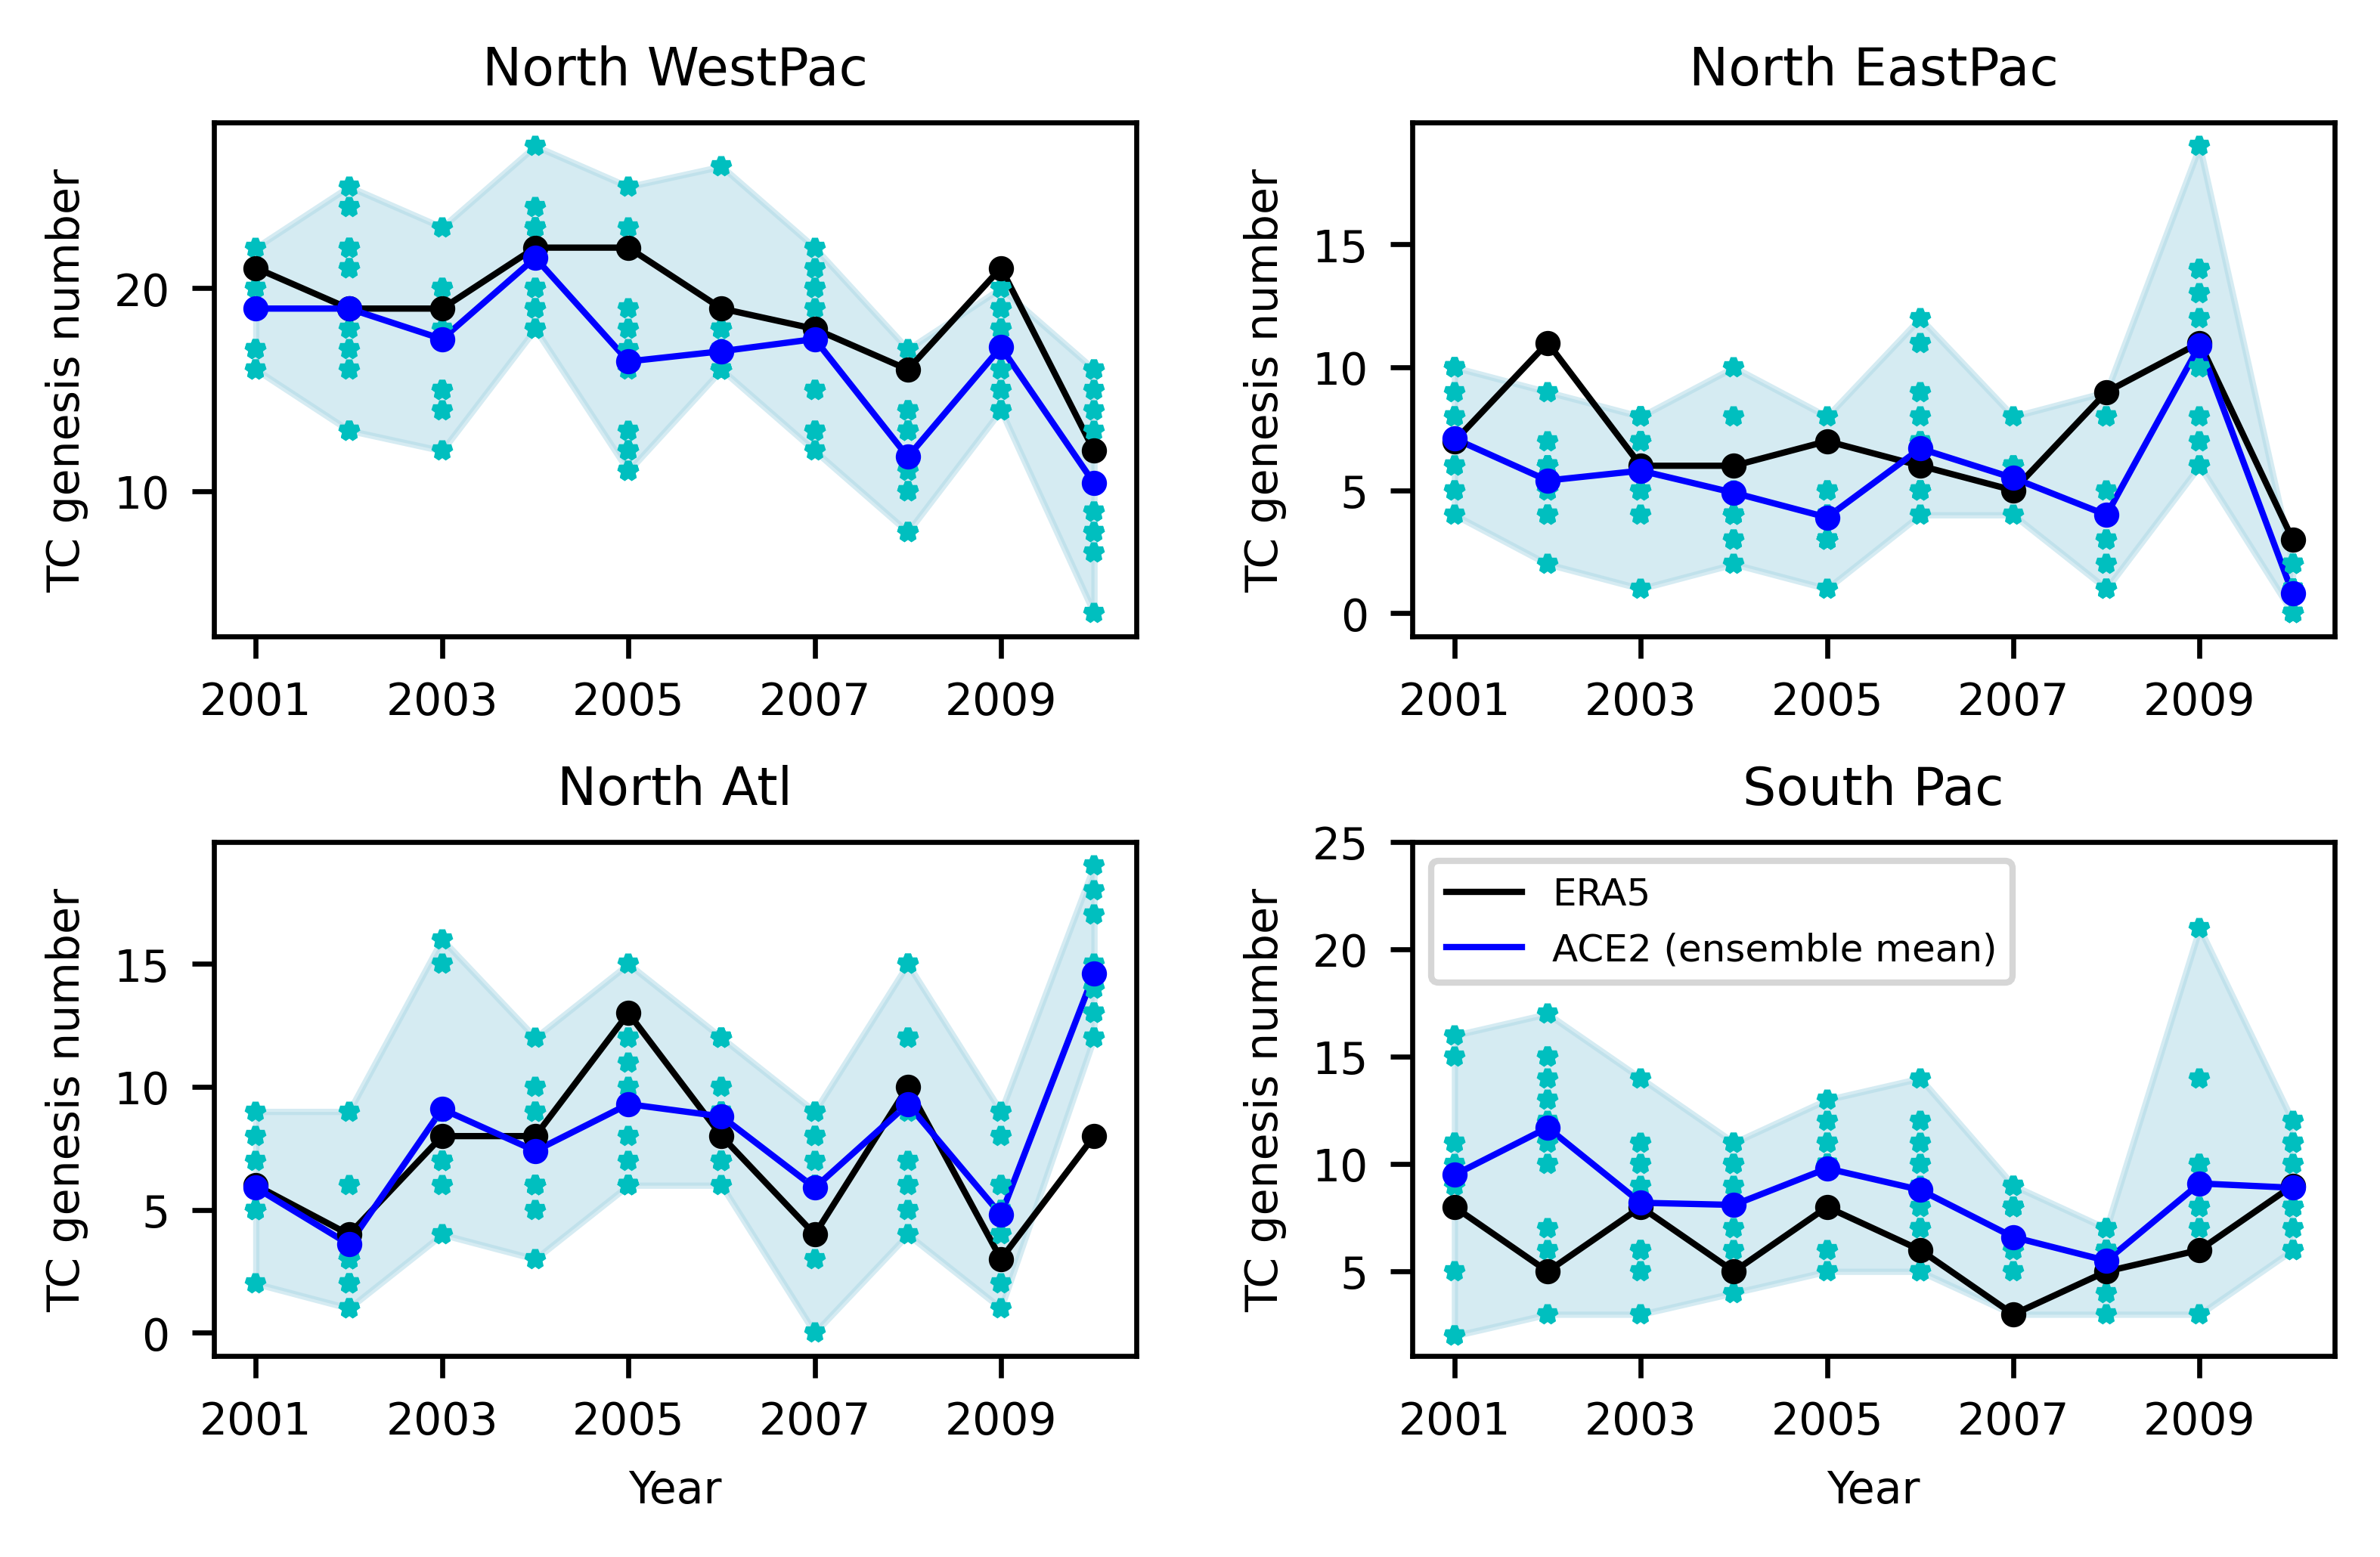

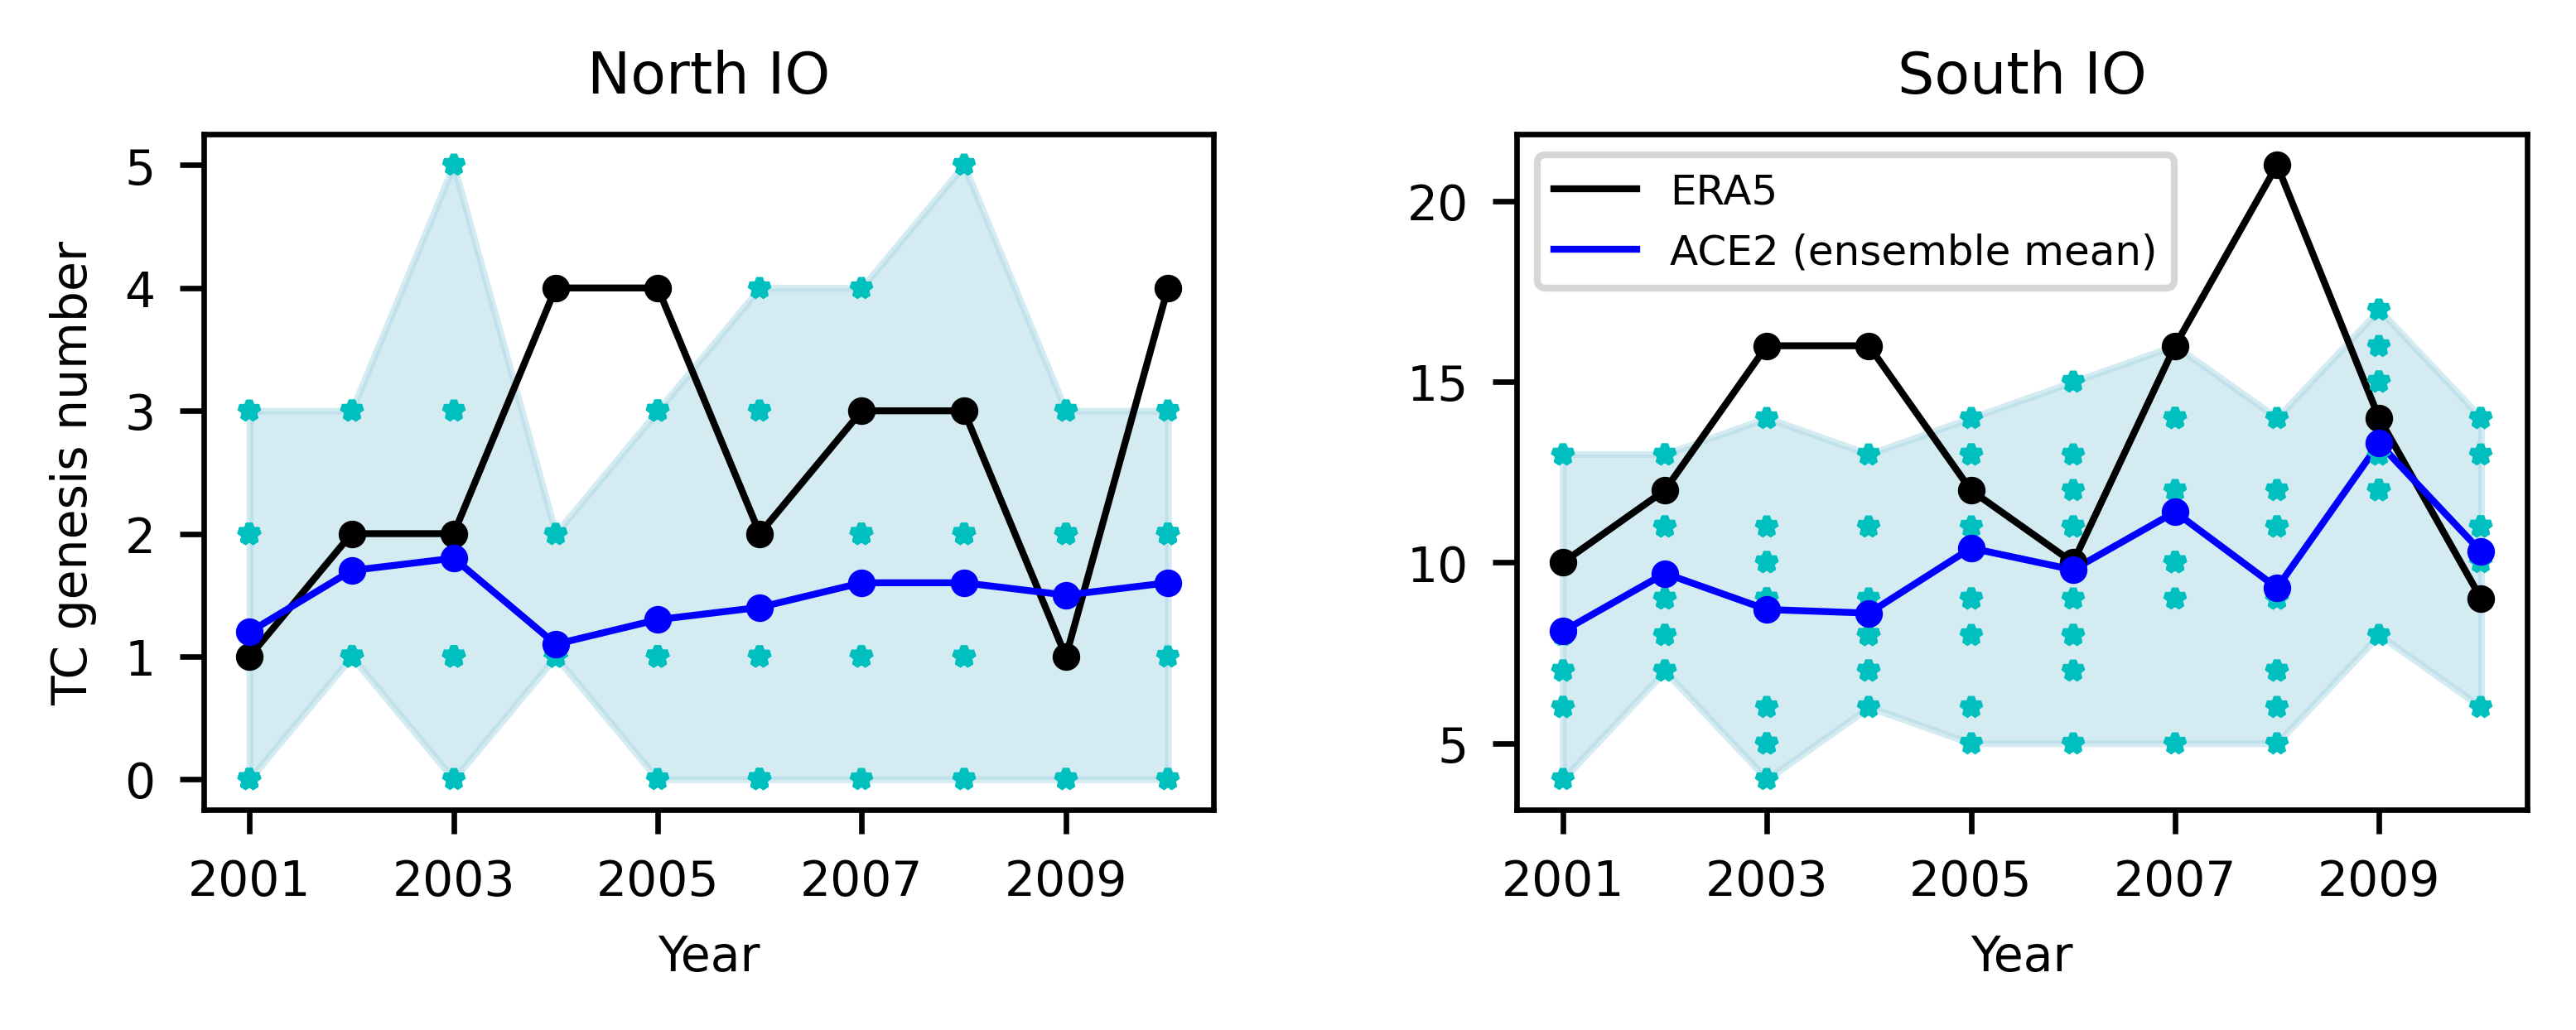

In [26]:
# Plot TC genesis number per year for each basin
yr_xtick = np.arange(2001, 2011, 2)
plt_list = list(['_all_basin','_no_IO','_IO'])
plt_4fig_id = np.array([1, 2, 3, 5])
plt_2fig_id = np.array([0, 4])
nbasin_plt = np.array([nbasin, 4, 2])

for iplt in range(0, np.size(plt_list)):
    fig_name = 'Fig.1.TC_genesis_year_basin_100yr_ensemble-mean'+plt_list[iplt]+'.png'
    if iplt == 0:
        fig = plt.subplots(2,3,figsize=(6.5, 4),dpi=600)
        plt.rcParams.update({'font.size': 7})
        plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.4)
    elif iplt == 1:
        fig = plt.subplots(2,2,figsize=(5.5, 4),dpi=600)
        plt.rcParams.update({'font.size': 7})
        plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.4)        
    elif iplt == 2:
        fig = plt.subplots(1,2,figsize=(5.5, 2),dpi=600)
        plt.rcParams.update({'font.size': 7})
        plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.3, hspace=0.4)    

    for ibasin in range(0, nbasin_plt[iplt]):

        if iplt == 0:
            plt.subplot(2, 3, ibasin+1)
            ibasin_plt = ibasin
        elif iplt == 1:
            plt.subplot(2, 2, ibasin+1)
            ibasin_plt = plt_4fig_id[ibasin]
        elif iplt == 2:
            plt.subplot(1, 2, ibasin+1)
            ibasin_plt = plt_2fig_id[ibasin]            


        # Plot 2001-2010
        plt.plot(yr, TC_genesis_yr_basin_era5_2001_2010[:, ibasin_plt], 'k-', linewidth=1, markersize=3)
        #plt.plot(yr, TC_genesis_yr_basin_ace2_2001_2010[:, ibasin], 'b-', linewidth=1, markersize=3) # plot single member from 2001 to 2010

        # Plot ensemble mean of 10 member
        plt.plot(yr, np.mean(TC_genesis_yr_basin_ace2[:,ibasin_plt,:],1), 'b-',linewidth=1, markersize=3)

        # Plot 10 member
        for imem in range(0, 10):
            plt.plot(yr, TC_genesis_yr_basin_ace2[:, ibasin_plt, imem], 'c *', linewidth=1, markersize=3)

        # Plot 2001-2010 as another member
        plt.plot(yr, TC_genesis_yr_basin_ace2_2001_2010[:, ibasin_plt], 'c *', linewidth=1, markersize=3)

        # Plot 2001-2010
        plt.plot(yr, TC_genesis_yr_basin_era5_2001_2010[:, ibasin_plt], 'ko', linewidth=1, markersize=3)
        #plt.plot(yr, TC_genesis_yr_basin_ace2_2001_2010[:, ibasin], 'bo', linewidth=1, markersize=3)

        # Plot ensemble mean of 10 member
        plt.plot(yr, np.mean(TC_genesis_yr_basin_ace2[:,ibasin_plt,:],1), 'bo',linewidth=1, markersize=3)

        # Plot shading (from 10 member)
        min1 = np.min(TC_genesis_yr_basin_ace2[:, ibasin_plt, :], 1)
        max1 = np.max(TC_genesis_yr_basin_ace2[:, ibasin_plt, :], 1)
        min2 = TC_genesis_yr_basin_ace2_2001_2010[:,ibasin_plt]
        max2 = TC_genesis_yr_basin_ace2_2001_2010[:,ibasin_plt]

        min = np.empty([nyr])
        max = np.empty([nyr])
        for iyr in range(0, nyr):
            if min1[iyr]<= min2[iyr]:
                min[iyr] = min1[iyr]
            else:
                min[iyr] = min2[iyr]

            if max1[iyr]>=max2[iyr]:
                max[iyr] = max1[iyr]
            else:
                max[iyr] = max2[iyr]

        plt.fill_between(yr, min, max, color='lightblue', alpha=0.5)
        
        plt.title(basin_long_list[ibasin_plt])
        plt.xticks(yr_xtick)

        if ibasin_plt == 3:
            plt.yticks(np.arange(0, 20, 5))
        elif ibasin_plt == 5:
            plt.yticks(np.arange(5, 30, 5))
        
        if iplt == 0:
            if ibasin == 0 or ibasin == 3:
                plt.ylabel('TC genesis number')
            
            if ibasin > 2:
                plt.xlabel('Year')
        elif iplt == 1:
            plt.ylabel('TC genesis number')
            if ibasin > 1:
                plt.xlabel('Year')
        elif iplt == 2:
            if ibasin == 0:
                plt.ylabel('TC genesis number')
            plt.xlabel('Year')

    plt.legend(['ERA5','ACE2 (ensemble mean)'], fontsize=6)
    plt.savefig(fig_dir+fig_name,format='png', dpi=600)
    plt.show()

# Count the averaged TC genesis number for each month for each basin

In [12]:
nmon = 12
TC_genesis_mon_basin_ace2 = np.zeros([nmon, nbasin, nmem])

for iyr in range(0, 10):

    yrname = yr_list[iyr]

    # Load TC genesis data from each year
    data = np.load(file_dir_multi_yr+'/TC_genesis_30SN/TC_genesis_10yr_'+yrname+'_from-slp_30SN.npz')

    # Assign basin index
    lon_TC   = data['lon_TC']
    lat_TC   = data['lat_TC']
    yr_fake_TC = data['yr']
    mon_TC     = data['mon']
    #if iexp == 0:
    basin_id_ace2 = np.zeros([np.size(lon_TC)])
    basin_id_ace2[:] = np.nan
    #else:
    #    basin_id_era5 = np.zeros([np.size(lon_TC)])
    #    basin_id_era5[:] = np.nan

    for i in range(0, np.size(lon_TC)):
        for ibasin in range(0, nbasin):
            #print(i, ibasin)
            if ( (lon_TC[i]-basin_lon_min[ibasin])*(basin_lon_max[ibasin]-lon_TC[i]) >= 0 ) and \
                ( (lat_TC[i]-basin_lat_min[ibasin])*(basin_lat_max[ibasin]-lat_TC[i]) >= 0 ):
                if iexp == 0:
                    basin_id_ace2[i] = ibasin
                #elif iexp == 1:
                #    basin_id_era5[i] = ibasin
                #print(ibasin)
                break
    
    for i in range(0, np.size(yr_fake_TC)):
        if np.isnan(basin_id_ace2[i]) != 1:
            imem    = int(yr_fake_TC[i]-2001)
            ibasin  = int(basin_id_ace2[i])
            imon    = int(mon_TC[i]-1)

            TC_genesis_mon_basin_ace2[ imon, ibasin, imem ] = TC_genesis_mon_basin_ace2[ imon, ibasin, imem ] + 1


In [13]:
# Save data
np.savez(file_dir_multi_yr + 'TC_genesis_number_mon_basin_mem_ace2_'+str(latmax)+'SN_100yr.npz', 
         TC_genesis_yr_basin_ace2 = TC_genesis_yr_basin_ace2,\
        basin_list = basin_list, basin_long_list=basin_long_list,\
        basin_lon_min = basin_lon_min, basin_lon_max = basin_lon_max, \
        basin_lat_min = basin_lat_min, basin_lat_max = basin_lat_max,\
        mon = np.arange(1,13), mem=np.arange(0,10) ) # (mon, basin, mem)

In [14]:
# Load TC_genesis_count from 2001 to 2010
data = np.load(file_dir_multi_yr_10yr +'TC_genesis_number_per_month_basin_ace2_era5-1deg_'+str(latmax)+'SN_2001-2010.npz')
TC_genesis_mon_basin_ace2_2001_2010 = data['TC_genesis_mon_basin_ace2']
TC_genesis_mon_basin_era5_2001_2010 = data['TC_genesis_mon_basin_era5']

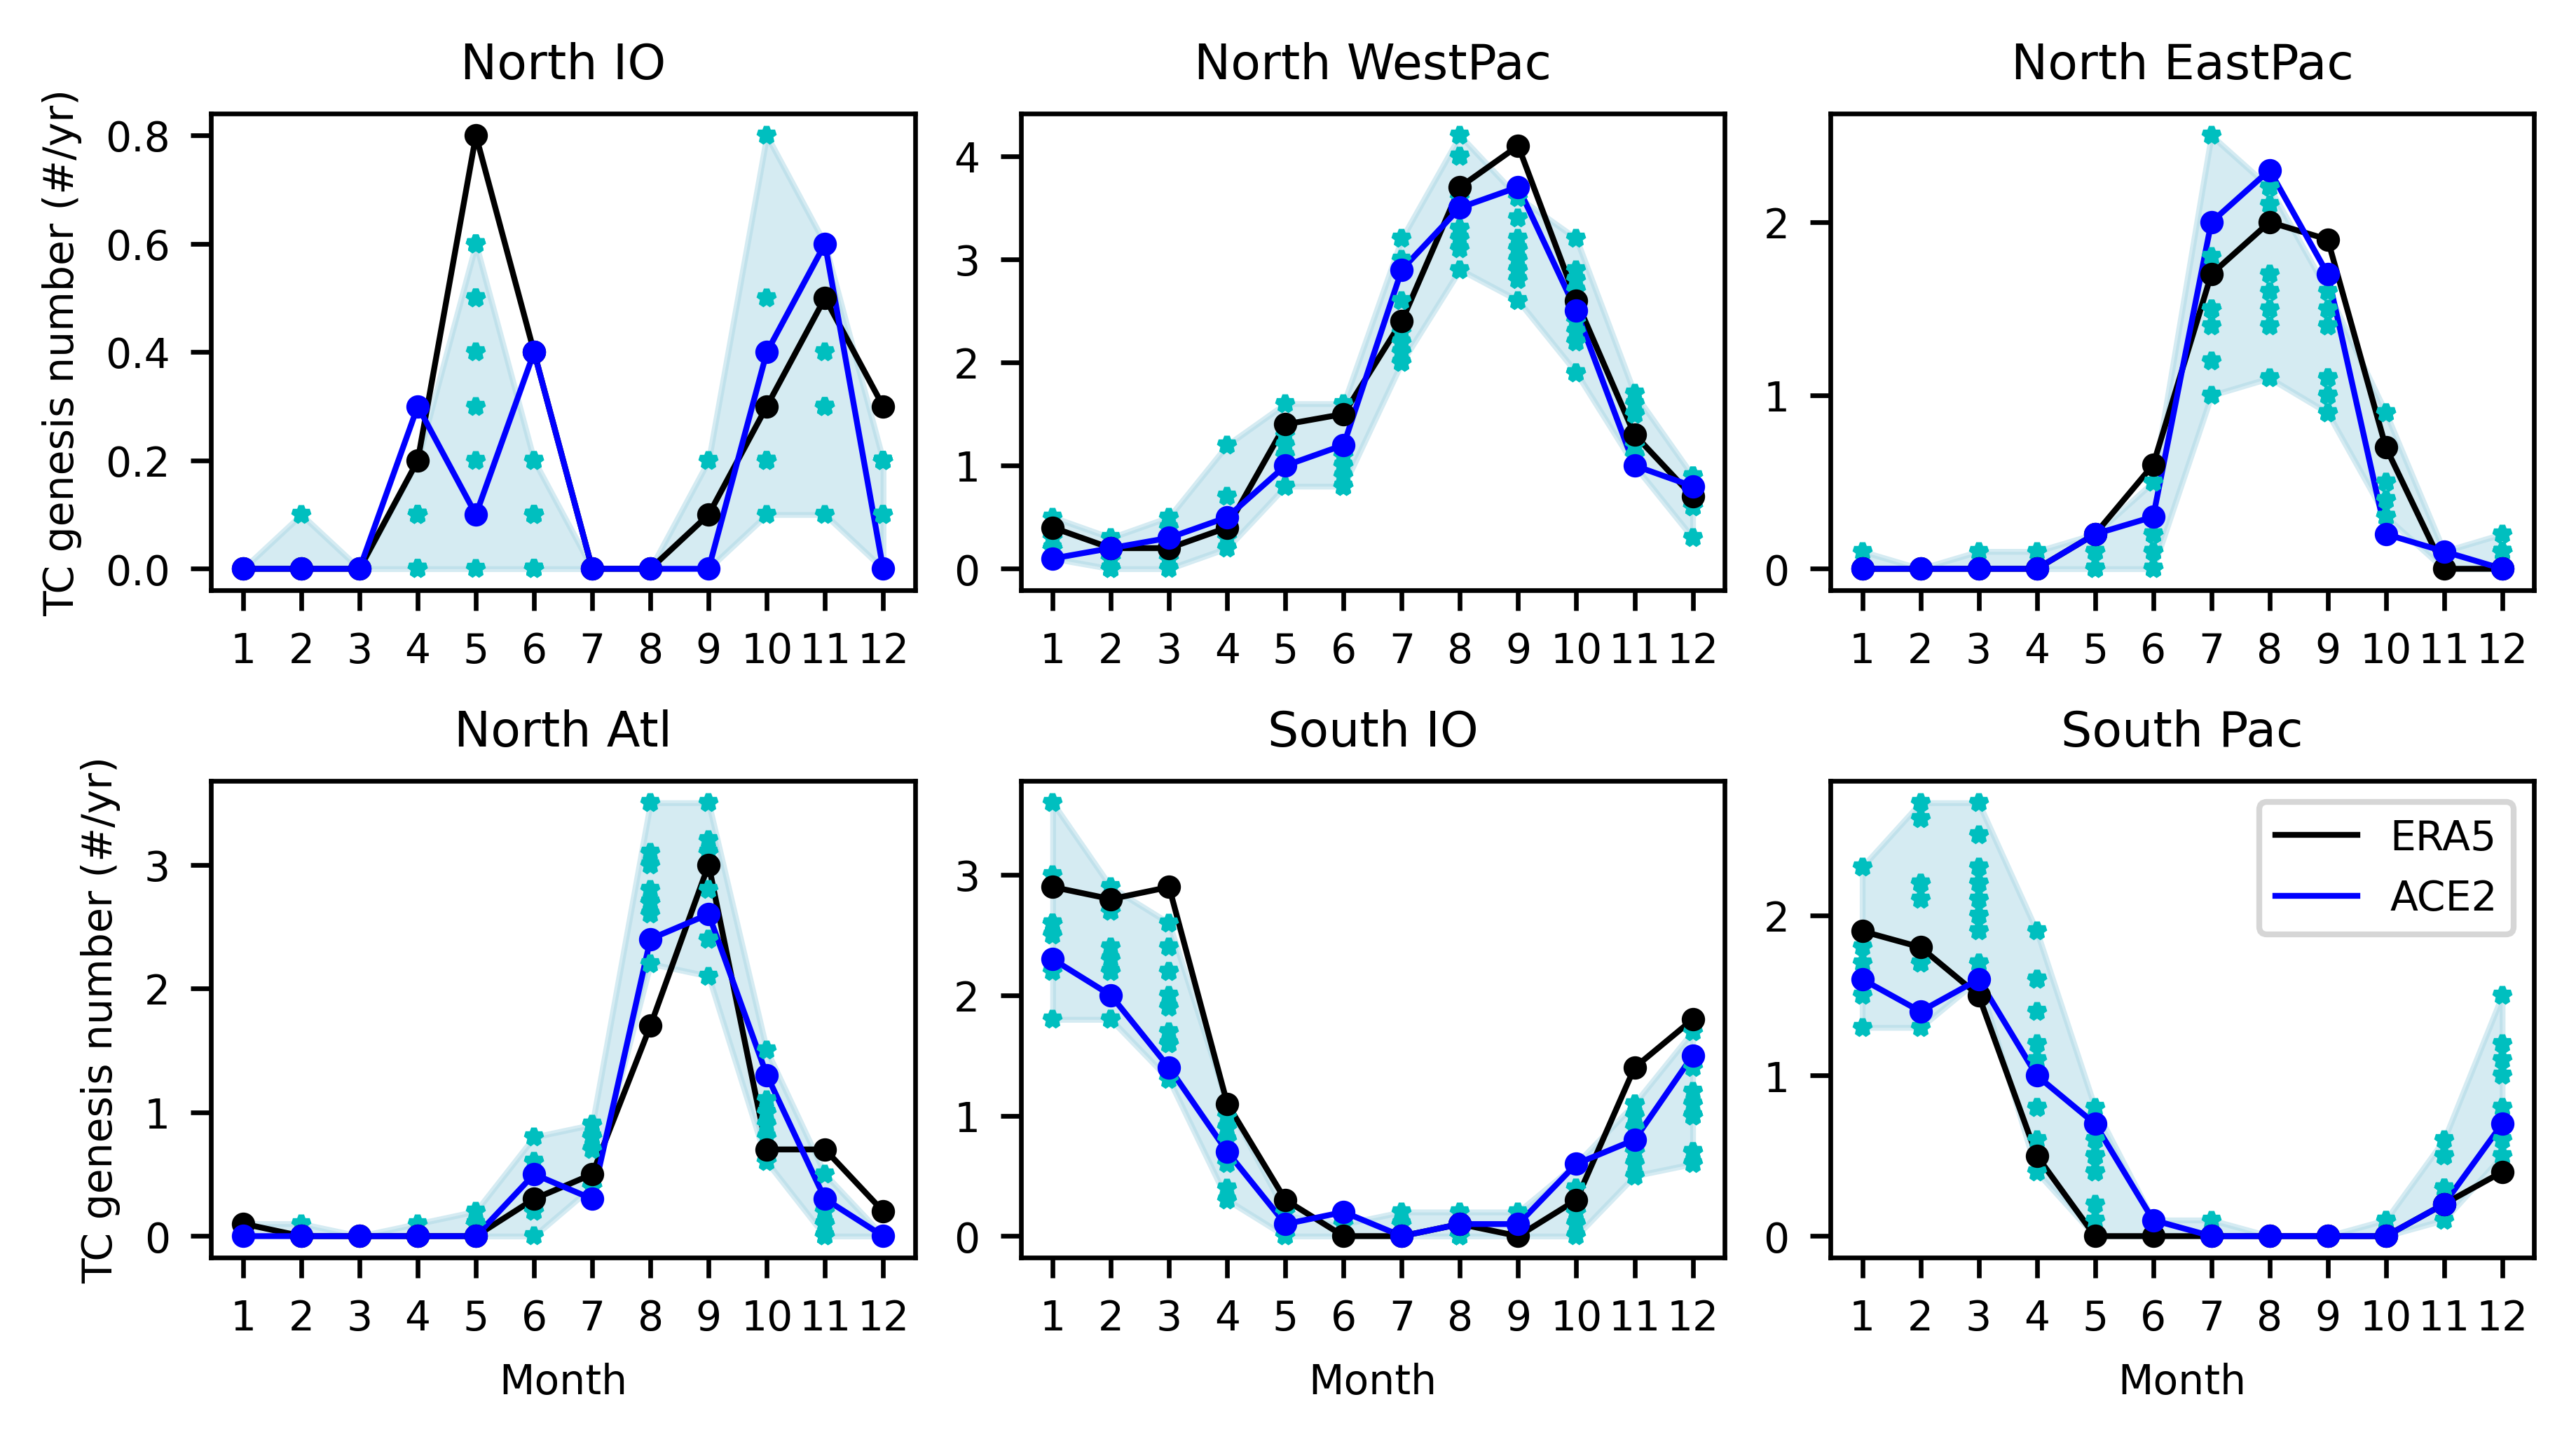

In [15]:
# Plot TC genesis number per month for each basin
mon = np.arange(1, 13)
mon_xtick = np.arange(1, 13)
v = 1
fig_name = 'Fig.2.TC_genesis_mon_basin_100yr_v'+str(v)+'.png'
fig = plt.subplots(2,3,figsize=(6.5, 4),dpi=600)
plt.rcParams.update({'font.size': 7})
plt.subplots_adjust(left=0.1,right=0.95,top=0.88,bottom=0.2, wspace=0.15, hspace=0.4)

for ibasin in range(0, nbasin):
    plt.subplot(2, 3, ibasin+1)

    # Plot 2001-2010
    plt.plot(mon, TC_genesis_mon_basin_era5_2001_2010[:, ibasin], 'k-', linewidth=1, markersize=3)
    plt.plot(mon, TC_genesis_mon_basin_ace2_2001_2010[:, ibasin], 'b-', linewidth=1, markersize=3)

    # Plot 10 member      
    for imem in range(0, 10):
        plt.plot(mon, TC_genesis_mon_basin_ace2[:, ibasin, imem]/nyr, 'c*', linewidth=1, markersize=3)
    
    # Plot shading (from 10 member)
    min = np.min(TC_genesis_mon_basin_ace2[:, ibasin, :], 1)/nyr
    max = np.max(TC_genesis_mon_basin_ace2[:, ibasin, :], 1)/nyr
    plt.fill_between(mon, min, max, color='lightblue', alpha=0.5)

    # Plot 2001-2010
    plt.plot(mon, TC_genesis_mon_basin_era5_2001_2010[:, ibasin], 'ko', linewidth=1, markersize=3)
    plt.plot(mon, TC_genesis_mon_basin_ace2_2001_2010[:, ibasin], 'bo', linewidth=1, markersize=3)
    
    plt.title(basin_long_list[ibasin])
    plt.xticks(mon_xtick)

    #if ibasin == 0:
    #    plt.yticks(np.arange(0, 15, 3))
    #elif ibasin == 5:
    #    plt.yticks(np.arange(3, 15, 3))
    
    if ibasin == 0 or ibasin == 3:
        plt.ylabel('TC genesis number (#/yr)')
    
    if ibasin > 2:
        plt.xlabel('Month')

    if ibasin == 5:
        plt.legend(['ERA5','ACE2'])
        #plt.legend(['ACE2'])
plt.savefig(fig_dir+fig_name,format='png', dpi=600)
plt.show()

# Find TC genesis for each month for each year for each basin 
This is used for scatter plot between actual TC number and TCGI in Plot_TCGI_100yr.ipynb

In [11]:
nmon = 12
TC_genesis_mon_yr_basin_ace2 = np.zeros([nmon, nyr, nbasin, nmem])

for iyr in range(0, nyr):

    yrname = yr_list[iyr]

    # Load TC genesis data from each year
    data = np.load(file_dir_multi_yr+'/TC_genesis_30SN/TC_genesis_10yr_'+yrname+'_from-slp_30SN.npz')

    # Assign basin index
    lon_TC   = data['lon_TC']
    lat_TC   = data['lat_TC']
    yr_fake_TC = data['yr']
    mon_TC     = data['mon']
    basin_id_ace2 = np.zeros([np.size(lon_TC)])
    basin_id_ace2[:] = np.nan


    for i in range(0, np.size(lon_TC)):
        for ibasin in range(0, nbasin):
            #print(i, ibasin)
            if ( (lon_TC[i]-basin_lon_min[ibasin])*(basin_lon_max[ibasin]-lon_TC[i]) >= 0 ) and \
                ( (lat_TC[i]-basin_lat_min[ibasin])*(basin_lat_max[ibasin]-lat_TC[i]) >= 0 ):
                if iexp == 0:
                    basin_id_ace2[i] = ibasin

                break
    
    for i in range(0, np.size(yr_fake_TC)):
        if np.isnan(basin_id_ace2[i]) != 1:
            imem    = int(yr_fake_TC[i]-2001)
            ibasin  = int(basin_id_ace2[i])
            imon    = int(mon_TC[i]-1)

            TC_genesis_mon_yr_basin_ace2[ imon, iyr, ibasin, imem ] = TC_genesis_mon_yr_basin_ace2[ imon, iyr, ibasin, imem ] + 1

# Save data
np.savez(file_dir_multi_yr + 'TC_genesis_number_mon_yr_basin_mem_ace2_'+str(latmax)+'SN_100yr.npz', 
         TC_genesis_mon_yr_basin_ace2 = TC_genesis_mon_yr_basin_ace2,\
        basin_list = basin_list, basin_long_list=basin_long_list,\
        basin_lon_min = basin_lon_min, basin_lon_max = basin_lon_max, \
        basin_lat_min = basin_lat_min, basin_lat_max = basin_lat_max,\
        mon = np.arange(1,13), yr = np.arange(2001, 2011), mem=np.arange(0,10) ) # (mon, yr, basin, mem)
